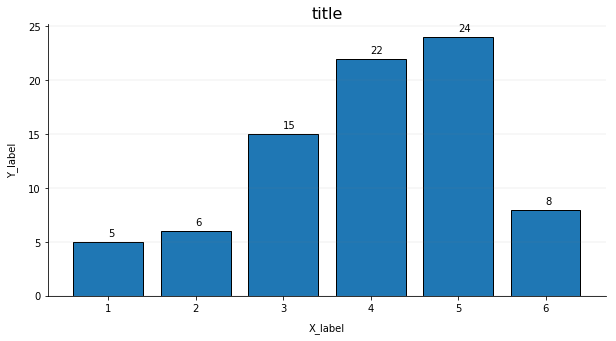

In [38]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import configparser

cf = configparser.ConfigParser()
cf.read("parameter.conf")


df1 = pd.DataFrame({'X':['1', '2', '3', '4', '5', '6'],
                    'Y': [5, 6, 15, 22, 24, 8]})


# font setting
font = {'fontsize': cf['font']['fontsize'],
        'fontweight' : cf['font']['fontweight'],
        'family' : cf['font']['family'],   # font family, default is DejaVu Sans
        'verticalalignment' : cf['font']['verticalalignment'],   # 'top', 'bottom', 'center', 'baseline'
        'horizontalalignment' : cf['font']['horizontalalignment']  # 'center', 'right', 'left'
       }


FigSize = tuple([float(i) for i in cf['DEFAULT']['figsize'][1:-1].split(",")])
fig, ax = plt.subplots(figsize=FigSize)

plt.bar('X', 'Y', data = df1, edgecolor=cf['bar']['edge_color'])


# title
plt.title("title", font, loc=cf['title']['location'], pad=float(cf['title']['pad']))


# labelpad: Spacing in points between the label and the x-axis.
plt.xlabel('X_label', labelpad=float(cf['label']['labelpad']))
plt.ylabel('Y_label', labelpad=float(cf['label']['labelpad']))

# removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# background grid setting
ax.yaxis.grid(color =cf['grid']['color'] , linewidth=float(cf['grid']['linewidth']), alpha=float(cf['grid']['alpha'])) # alpha: soft color


# present number on graph
for x, v in enumerate(list(df1['X'].values)):
    plt.text(x, df1['Y'].values.tolist()[x]+0.5, str(df1['Y'].values.tolist()[x]), color='black')


plt.show()

# group data

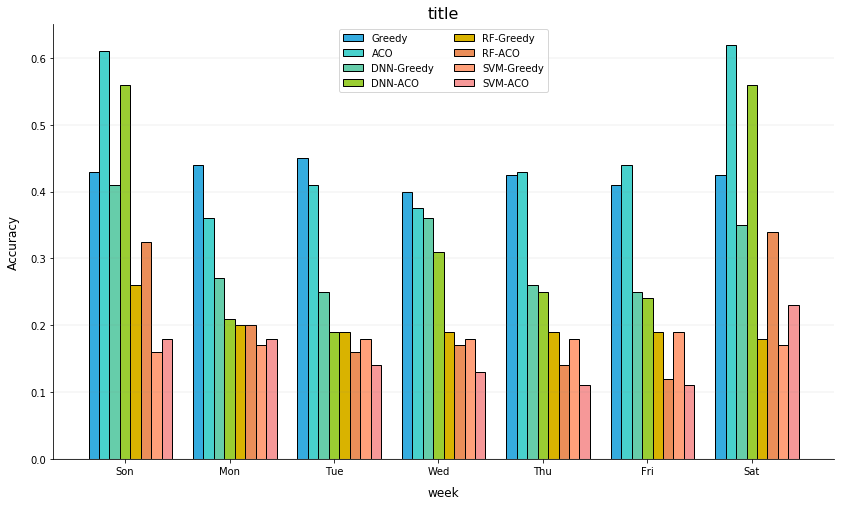

In [41]:
df2 = pd.DataFrame({'week':["Son","Mon","Tue","Wed","Thu","Fri","Sat"],
                'Greedy':[0.43, 0.44, 0.45, 0.4, 0.425, 0.41,0.425],
                'ACO' :[0.61, 0.36, 0.41, 0.375, 0.43, 0.44, 0.62],
                'DNN-Greedy':[0.41, 0.27, 0.25, 0.36, 0.26, 0.25, 0.35],
                'DNN-ACO':[0.56, 0.21, 0.19, 0.31, 0.25, 0.24, 0.56],
                'RF-Greedy':[0.26, 0.2, 0.19, 0.19, 0.19, 0.19, 0.18],
                'RF-ACO':[0.325, 0.2, 0.16, 0.17, 0.14, 0.12, 0.34],
                'SVM-Greedy':[0.16, 0.17, 0.18, 0.18, 0.18, 0.19, 0.17],
                'SVM-ACO':[0.18, 0.18, 0.14, 0.13, 0.11, 0.11, 0.23]})


# font setting
font = {'fontsize': cf['font']['fontsize'],
        'fontweight' : cf['font']['fontweight'],
        'family' : cf['font']['family'],
        'verticalalignment' : cf['font']['verticalalignment'],
        'horizontalalignment' : cf['font']['horizontalalignment']
       }


barWidth = float(cf['bar']['bar_width'])
# set location of bar on x axis
r1 = np.arange(len(df2['week'].values.tolist()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]


grouped_FigSize = tuple([float(i) for i in cf['bar']['figsize'][1:-1].split(",")])
fig, ax = plt.subplots(figsize=grouped_FigSize)



# setting color
color1 = '#35ACDF'
color2 = 'mediumturquoise'
color3 = 'mediumaquamarine'
color4 = 'yellowgreen'
color5 = '#D9B300'
color6 = '#EB8E59'
color7 = 'lightsalmon'
color8 = '#F69898'

edge_color = cf['bar']['edge_color']

# make plot
plt.bar(r1, df2['Greedy'].values.tolist(), color='#35ACDF', width=barWidth, edgecolor=cf['bar']['edge_color'] , label='Greedy')
plt.bar(r2, df2['ACO'].values.tolist(), color='mediumturquoise', width=barWidth, edgecolor=cf['bar']['edge_color'], label='ACO')
plt.bar(r3, df2['DNN-Greedy'].values.tolist(), color='mediumaquamarine', width=barWidth, edgecolor=cf['bar']['edge_color'], label='DNN-Greedy')
plt.bar(r4, df2['DNN-ACO'].values.tolist(), color='yellowgreen', width=barWidth, edgecolor=cf['bar']['edge_color'], label='DNN-ACO')
plt.bar(r5, df2['RF-Greedy'].values.tolist(), color='#D9B300', width=barWidth, edgecolor=cf['bar']['edge_color'], label='RF-Greedy')
plt.bar(r6, df2['RF-ACO'].values.tolist(), color='#EB8E59', width=barWidth, edgecolor=cf['bar']['edge_color'], label='RF-ACO')
plt.bar(r7, df2['SVM-Greedy'].values.tolist(), color='lightsalmon', width=barWidth, edgecolor=cf['bar']['edge_color'], label='SVM-Greedy')
plt.bar(r8, df2['SVM-ACO'].values.tolist(), color='#F69898', width=barWidth, edgecolor=cf['bar']['edge_color'], label='SVM-ACO')

# title
#plt.title("title", fontsize=12, family='DejaVu Sans', loc='center', pad=5)
plt.title("title", fontdict = font, loc=cf['title']['location'] , pad=float(cf['title']['pad']))

# label setting
# labelpad: Spacing in points between the label and the x-axis.
plt.xlabel('week', fontsize = float(cf['label']['fontsize']), labelpad=float(cf['label']['labelpad']))
plt.ylabel('Accuracy', fontsize = float(cf['label']['fontsize']), labelpad=float(cf['label']['labelpad']))


# adjust location of xticks label
plt.xticks([x + 0.2 + barWidth for x in range(len(df2['week'].values.tolist()))], df2['week'].values.tolist())


# removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# background grid setting
ax.yaxis.grid(color =cf['grid']['color'] , linewidth=float(cf['grid']['linewidth']), alpha=float(cf['grid']['alpha'])) # alpha: soft color


# legend
plt.legend(ncol=int(cf['legend']['ncol']))

# save plot as png file
plt.savefig('grouped_barchart.pdf')

plt.show()

# Error Bar

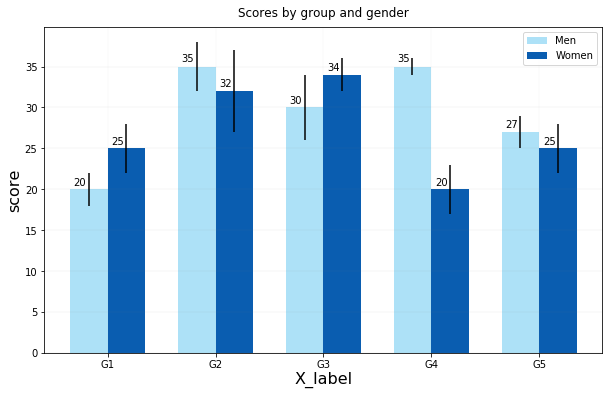

In [9]:
df3 = pd.DataFrame({'men_means'  :[20, 35, 30, 35, 27],
                    'men_std'    :[2, 3, 4, 1, 2],
                    'women_means':[25, 32, 34, 20, 25],
                    'women_std'  :[3, 5, 2, 3, 3]})



ind = np.arange(len(df3['men_means'].values.tolist()))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))

rects1 = ax.bar(ind - width/2, df3['men_means'].values.tolist(), width, yerr=df3['men_std'].values.tolist(),
                color='#ADE1F7', label='Men')
rects2 = ax.bar(ind + width/2, df3['women_means'].values.tolist(), width, yerr=df3['women_std'].values.tolist(),
                color='#0A5DB0', label='Women')

# title
plt.title("Scores by group and gender",loc='center', pad=10)

# legend
# labelpad: Spacing in points between the label and the x-axis.
plt.xlabel('X_label', fontdict=font, labelpad=10)
plt.ylabel('score', fontdict=font, labelpad=10)


# tick
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

# legend
ax.legend()

# background grid setting
ax.xaxis.grid(color ='grey', linewidth=0.1, alpha=0.4) # alpha: soft color
ax.yaxis.grid(color ='grey', linewidth=0.2, alpha=0.4) # alpha: soft color


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "left")

plt.savefig('Error bar.pdf') # save plot as png
plt.show()

# stacked bar chart

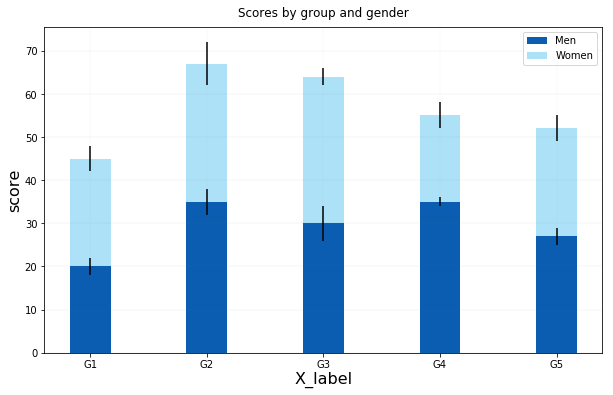

In [10]:
df3 = pd.DataFrame({'men_means'  :[20, 35, 30, 35, 27],
                    'men_std'    :[2, 3, 4, 1, 2],
                    'women_means':[25, 32, 34, 20, 25],
                    'women_std'  :[3, 5, 2, 3, 3]})



ind = np.arange(len(df3['men_means'].values.tolist()))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))

rects1 = ax.bar(ind, df3['men_means'].values.tolist(), width, yerr=df3['men_std'].values.tolist(),
                color='#0A5DB0', label='Men')
rects2 = ax.bar(ind, df3['women_means'].values.tolist(), width, yerr=df3['women_std'].values.tolist(),
                bottom = df3['men_means'].values.tolist(), color='#ADE1F7', label='Women')

# title
plt.title("Scores by group and gender",loc='center', pad=10)

# legend
# labelpad: Spacing in points between the label and the x-axis.
plt.xlabel('X_label', fontdict=font, labelpad=10)
plt.ylabel('score', fontdict=font, labelpad=10)


# tick
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

# legend
ax.legend()

# background grid setting
ax.xaxis.grid(color ='grey', linewidth=0.1, alpha=0.4) # alpha: soft color
ax.yaxis.grid(color ='grey', linewidth=0.2, alpha=0.4) # alpha: soft color


plt.savefig('stacked bar.pdf') # save plot as png
plt.show()